In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('BasicData.csv')
gene_antibiotic_df = pd.read_csv('Empty_Gene_Antibiotic.csv')

In [228]:
df

,#Organism group,Isolate,AMR genotypes,drug,resistance
0,Listeria monocytogenes,PDT000077416.3,"fosx, lin",chloramphenicol,0.0
1,Listeria monocytogenes,PDT000077416.3,"fosx, lin",clindamycin,1.0
2,Listeria monocytogenes,PDT000077416.3,"fosx, lin",erythromycin,0.0
3,Listeria monocytogenes,PDT000077416.3,"fosx, lin",gentamicin,0.0
4,Listeria monocytogenes,PDT000077416.3,"fosx, lin",levofloxacin,0.0
...,...,...,...,...,...
316066,Enterobacter roggenkampii,PDT000898827.2,"blamir, cata, fosa, mcr10.1, oqxa, oqxb",tetracycline,0.0
316067,Enterobacter roggenkampii,PDT000898827.2,"blamir, cata, fosa, mcr10.1, oqxa, oqxb",trimethoprim-sulfamethoxazole,0.0
316068,Enterobacter roggenkampii,PDT001161812.2,"blamir16, cata, fosa, oqxb",ertapenem,0.0
316069,Enterobacter roggenkampii,PDT001161812.2,"blamir16, cata, fosa, oqxb",imipenem,0.5


In [229]:
def gene_per_drug_all(drug):
    drug_df = df[df['drug'] == drug]
    unique_genes = set()
    for genes in drug_df['AMR genotypes'].str.split(', '):
        unique_genes.update(genes)
    return drug_df, unique_genes

In [230]:
def create_gene_df_clustering(drug_df, unique_genes):
    gene_arrays = []

    for idx, row in drug_df.iterrows():
        gene_array = np.zeros(len(unique_genes), dtype=int)
        genes = row['AMR genotypes'].split(', ')
        for gene in genes:
            gene_index = list(unique_genes).index(gene)
            gene_array[gene_index] = 1
            
        gene_arrays.append(gene_array.tolist())


    gene_df = pd.DataFrame(gene_arrays, columns=list(unique_genes))
   
    return gene_df.sample(frac=1).reset_index(drop=True)

In [231]:
def create_gene_df(drug_df, unique_genes):
    gene_arrays = []
    labels = []

    for idx, row in drug_df.iterrows():
        gene_array = np.zeros(len(unique_genes), dtype=int)
        genes = row['AMR genotypes'].split(', ')
        for gene in genes:
            gene_index = list(unique_genes).index(gene)
            gene_array[gene_index] = 1
            
        gene_arrays.append(gene_array.tolist())
        labels.append(row['resistance'])

    gene_df = pd.DataFrame(gene_arrays, columns=list(unique_genes))
    gene_df['label'] = labels
  

    return gene_df.sample(frac=1).reset_index(drop=True)

In [232]:
def KModes_model(df):
    hamming_distances = pdist(df.values, metric='hamming')
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df.values)
    k = 3  # Number of clusters
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(drug_df_for_clustering.values)
    # Visualize the clusters (using the reduced_data and labels from the previous example)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
    plt.title('K-Modes Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [233]:
drug = 'ciprofloxacin'
drug_df,drug_genes = gene_per_drug_all(drug)


In [234]:
drug_df = create_gene_df(drug_df, drug_genes)
drug_df

,blaorn1,catb,oqxb25,qnrb10,mgrbq30stop,blacmy83,nfsar203c,qnrvc,blartg,parcs87i,...,blaoxa313,blavim4,blaadc5,gyrat83i,blashv205,tet41,blaoxa193,blaadc79,blaadc219,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [160]:
# KModes_model(drug_df_for_clustering)

In [76]:
hamming_distances = pdist(drug_df_for_clustering.values, metric='hamming')


In [79]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(drug_df_for_clustering.values)


In [80]:
k = 3  # Number of clusters
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(drug_df_for_clustering.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3564, cost: 126375.0
Run 1, iteration: 2/100, moves: 986, cost: 126007.0
Run 1, iteration: 3/100, moves: 858, cost: 125367.0
Run 1, iteration: 4/100, moves: 83, cost: 125367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4877, cost: 119012.0
Run 2, iteration: 2/100, moves: 1077, cost: 119012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5392, cost: 118594.0
Run 3, iteration: 2/100, moves: 1039, cost: 118594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1566, cost: 121710.0
Run 4, iteration: 2/100, moves: 814, cost: 121710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3637, cost: 112268.0
Run 5, iteration: 2/10

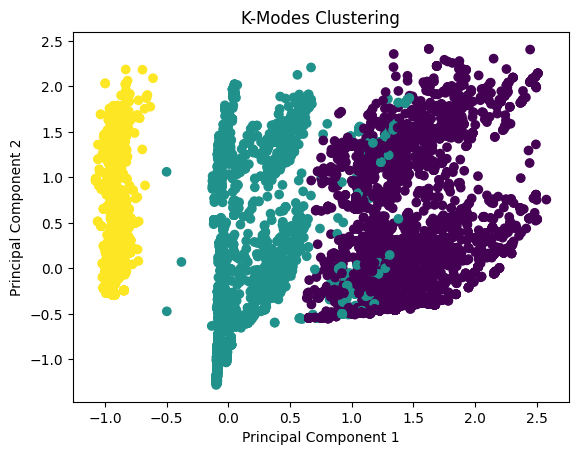

In [81]:
# Visualize the clusters (using the reduced_data and labels from the previous example)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('K-Modes Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

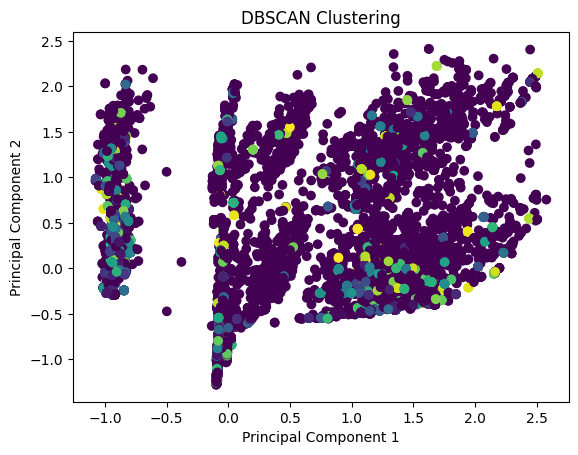

In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your binary data is stored in a DataFrame named binary_df
binary_data = drug_df_for_clustering.to_numpy()

# Dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(binary_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(binary_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [94]:
def plot_data(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, cmap='binary', cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()
    

In [145]:
def Bicluster_model(df, n_clusters):
    data_matrix = df.to_numpy()
    # Perform biclustering
    bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
    bicluster.fit(data_matrix)
    row_labels = bicluster.row_labels_
    # Create a DataFrame with the cluster labels
    cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
    cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

    # Sort the DataFrame based on the cluster labels
    cluster_df.sort_values('Cluster', inplace=True)

    # Drop the 'Cluster' column for visualization
    cluster_df.drop('Cluster', axis=1, inplace=True)
    return cluster_df

In [186]:
# def Bicluster_model_viz(df, n_clusters, title):
#     df.drop('label',axis=1, inplace=True)
#     data_matrix = df.to_numpy()
#     # Perform biclustering
#     bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
#     bicluster.fit(data_matrix)
#     row_labels = bicluster.row_labels_
#     # Create a DataFrame with the cluster labels
#     cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
#     cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

#     # Sort the DataFrame based on the cluster labels
#     cluster_df.sort_values('Cluster', inplace=True)

#     # Drop the 'Cluster' column for visualization
#     cluster_df.drop('Cluster', axis=1, inplace=True)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cluster_df, cmap='binary', cbar=False)
#     plt.title(title)
#     plt.xlabel('Gene')
#     plt.ylabel('Bacteria')
#     plt.show()

In [237]:
def Bicluster_model_viz(df, n_clusters, title):
    df_copy = df.copy()
    df_copy.drop('label', axis=1, inplace=True)
    data_matrix = df_copy.to_numpy()
    
    # Perform biclustering
    bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=42)
    bicluster.fit(data_matrix)
    row_labels = bicluster.row_labels_
    
    # Create a DataFrame with the cluster labels
    cluster_df = pd.DataFrame(data_matrix, index=df.index, columns=df_copy.columns)
    cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels
    cluster_df['label'] = df['label']  # Add a column for the original labels
    
    # Sort the DataFrame based on the row labels
    cluster_df.sort_values('Cluster', inplace=True)
    
    # Reindex the DataFrame with a combination of original index, label, and row labels
    cluster_df.set_index(['Cluster', 'label'], append=True, inplace=True)
    cluster_df.sort_index(level='Cluster', inplace=True)
    
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette('binary', as_cmap=True)
    sns.heatmap(cluster_df, cmap=cmap, cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()
    return cluster_df

In [226]:
cluster_df.to_csv('cluster_df_ciprofloxacin.csv')

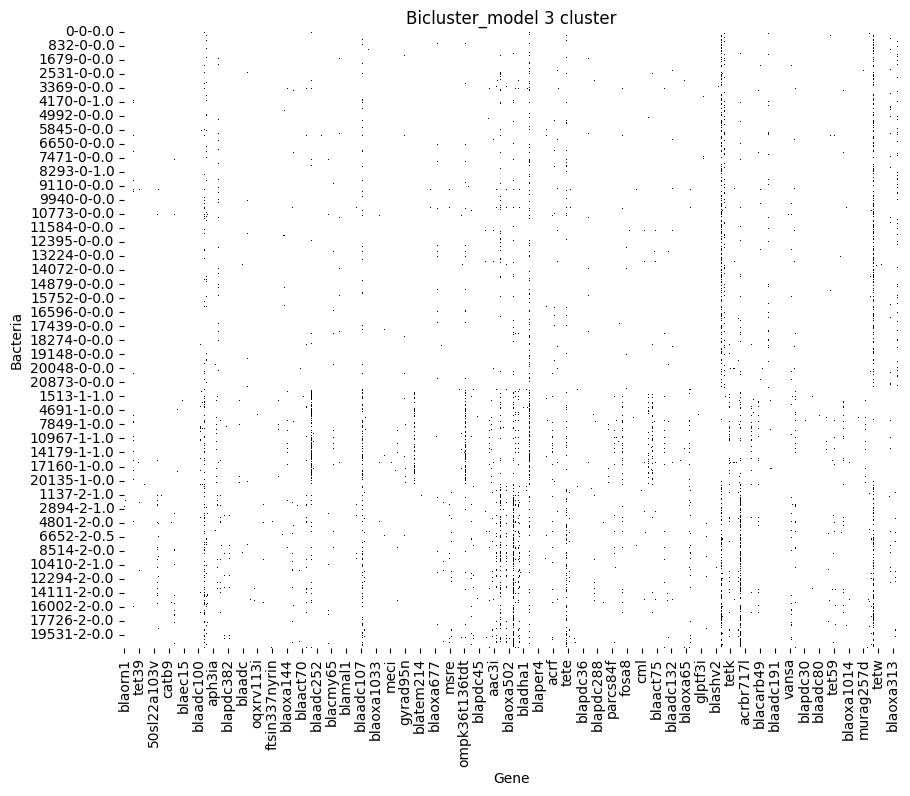

In [222]:
Bicluster_model_viz(drug_df, 3, 'Bicluster_model 3 cluster')

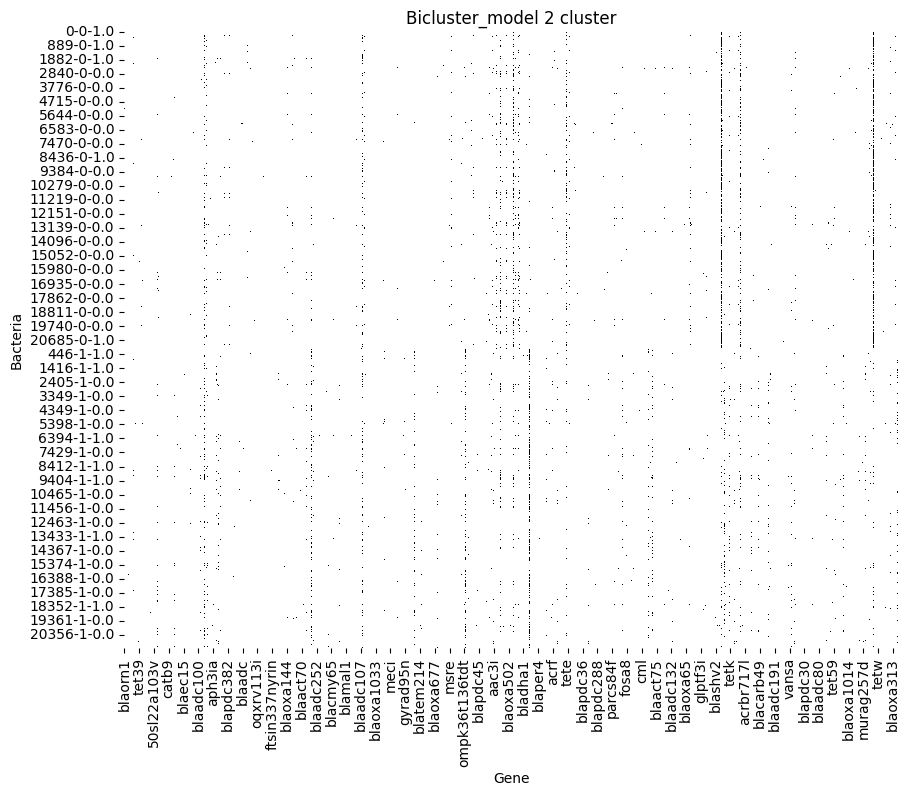

In [238]:
cluster_df_2_ciprofloxacin = Bicluster_model_viz(drug_df, 2, 'Bicluster_model 2 cluster')
cluster_df_2_ciprofloxacin.to_csv('cluster_df_2_ciprofloxacin.csv')

In [171]:
def plot_data_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette('viridis', as_cmap=True)
    sns.heatmap(df, cmap=cmap, cbar=False)
    plt.title(title)
    plt.xlabel('Gene')
    plt.ylabel('Bacteria')
    plt.show()


In [ ]:

# Assuming your data matrix is stored in a DataFrame named data_matrix
data_matrix = drug_df_for_clustering.to_numpy()

# Perform biclustering
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)

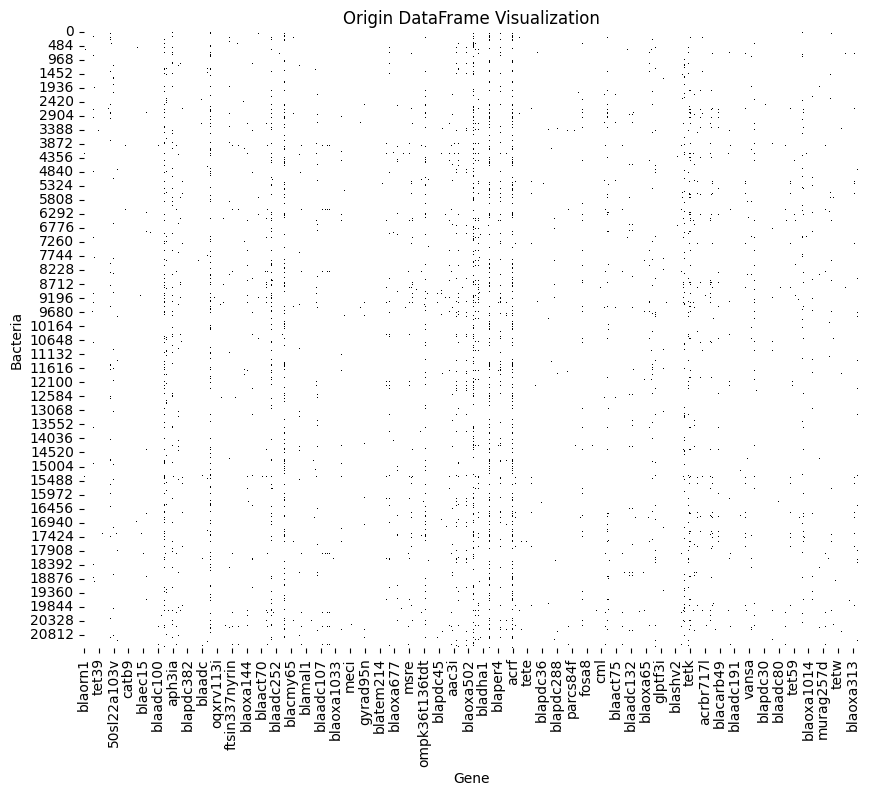

In [75]:
#plot origin data

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(drug_df_for_clustering, cmap='binary', cbar=False)
plt.title('Origin DataFrame Visualization')
plt.xlabel('Gene')
plt.ylabel('Bacteria')
plt.show()

## on the train data

In [138]:
drug_train_for_model_ciprofloxacin = pd.read_csv(r'drug_train_for_model_ciprofloxacin.csv')
drug_train_for_model_ciprofloxacin = drug_train_for_model_ciprofloxacin.drop('label', axis=1)
drug_train_for_model_ciprofloxacin = drug_train_for_model_ciprofloxacin.drop('Unnamed: 0', axis=1)
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Assuming your array is named data_array
has_inf = np.isinf(data_matrix).any()
has_nan = np.isnan(data_matrix).any()

print("Contains Infinite Values:", has_inf)
print("Contains NaN Values:", has_nan)

Contains Infinite Values: False
Contains NaN Values: False


In [113]:
data_matrix = df.to_numpy()
# Perform biclustering
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)
row_labels = bicluster.row_labels_
# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

# Sort the DataFrame based on the cluster labels
cluster_df.sort_values('Cluster', inplace=True)

# Drop the 'Cluster' column for visualization
cluster_df.drop('Cluster', axis=1, inplace=True)

In [128]:
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
data_matrix = drug_train_for_model_ciprofloxacin.to_numpy()
bicluster = SpectralBiclustering(n_clusters=3, random_state=42)
bicluster.fit(data_matrix)

C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:35: RuntimeWarning: divide by zero encountered in divide
  row_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=1))).squeeze()
C:\Users\PC\PycharmProjects\Ex3_machineLearning\venv\lib\site-packages\sklearn\cluster\_bicluster.py:45: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [117]:
row_labels = bicluster.row_labels_


In [ ]:
cluster_df = pd.DataFrame(data_matrix, index=row_labels, columns=df.columns)
cluster_df['Cluster'] = row_labels  # Add a column for the cluster labels

In [111]:
drug_df_for_clustering

,blaorn1,catb,oqxb25,qnrb10,mgrbq30stop,blacmy83,nfsar203c,qnrvc,blartg,parcs87i,...,blaadc33,blaoxa313,blavim4,blaadc5,gyrat83i,blashv205,tet41,blaoxa193,blaadc79,blaadc219
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
drug_train_for_model_ciprofloxacin

,qnrb6,qnrb4,qnrb19,qnrs2,qnrb1,qnrs1,qnrb35,qnrd1,qnre1,qnra6,qnrb2,qnrvc1,qnrb7,qnrb9,qnrb10,qnrb38,qnra1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
